In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x1_train = np.load('files/train_vectors/train_anger_vecs.npy')
x1_dev = np.load('files/dev_vectors/dev_anger_vecs.npy')
x1_test = np.load('files/test_vectors/test_anger_vecs.npy')
y1_train = np.load('files/gold_label_vectors/train/anger.npy')

y1_dev = np.load('files/gold_label_vectors/dev/anger.npy')

y1_test = np.load('files/gold_label_vectors/test/anger.npy')

embedding_vectors = np.load('files/embedding_vectors/glove_embedding_vectors.npy')
max_length = 79
vocab_size = 8263

In [5]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Concatenate
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model
from keras import Model
from keras.layers.core import Activation

import time

Using TensorFlow backend.


In [6]:
import keras.backend as K
def r2(y_true, y_pred):
    a = K.square(y_pred - y_true)
    b = K.sum(a)
    c = K.mean(y_true)
    d = K.square(y_true - c)
    e = K.sum(d)
    f = 1 - b / e
    return f

In [7]:
def define_model(vocab_size, max_length, to_file):
    model = Sequential()
    # use Pre-trained Embedding (Word2vec)
    model.add(Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable = False))
    model.add(Dropout(0.5))
    model.add(Conv1D(64, 3, border_mode='valid',activation='relu',subsample_length=1))
    model.add(MaxPooling1D())
    model.add(Dropout(0.5))
    model.add(LSTM(16))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    # compile network
    model.compile(loss='mse', optimizer='adam', metrics=['mae',r2])
    # summarize defined model
    model.summary()
    plot_model(model, to_file, show_shapes=True)
    return model


In [8]:
# train the DL model (CNN + LSTM)
to_file='model_clean_glove_hashtag.png'
model = define_model(vocab_size, max_length, to_file)


start_time_dl =time.time()

history = model.fit(x1_train, y1_train, epochs = 150, batch_size = 16, verbose = 2, validation_data=(x1_dev,y1_dev))

trainingtime = pd.DataFrame(columns = ["Classifier", "Training Time(Seconds)"])
trainingtime.loc[0] = ["Deep Learning Model_clean_glove_hashta", round((time.time()-start_time_dl), 2)] 

model.save('model_clean_glove_hashtag.h5')

C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, activation="relu", strides=1, padding="valid")`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 79, 100)           826300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 79, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 77, 64)            19264     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 38, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 38, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)               

Epoch 59/150
 - 1s - loss: 0.0143 - mae: 0.0939 - r2: 0.4394 - val_loss: 0.0181 - val_mae: 0.1115 - val_r2: 0.1480
Epoch 60/150
 - 1s - loss: 0.0135 - mae: 0.0920 - r2: 0.4590 - val_loss: 0.0153 - val_mae: 0.1036 - val_r2: 0.2834
Epoch 61/150
 - 1s - loss: 0.0132 - mae: 0.0910 - r2: 0.4893 - val_loss: 0.0153 - val_mae: 0.1027 - val_r2: 0.2706
Epoch 62/150
 - 1s - loss: 0.0131 - mae: 0.0898 - r2: 0.4741 - val_loss: 0.0152 - val_mae: 0.1018 - val_r2: 0.2919
Epoch 63/150
 - 1s - loss: 0.0124 - mae: 0.0880 - r2: 0.5036 - val_loss: 0.0169 - val_mae: 0.1075 - val_r2: 0.2149
Epoch 64/150
 - 1s - loss: 0.0123 - mae: 0.0862 - r2: 0.5231 - val_loss: 0.0167 - val_mae: 0.1063 - val_r2: 0.2237
Epoch 65/150
 - 1s - loss: 0.0129 - mae: 0.0890 - r2: 0.4893 - val_loss: 0.0168 - val_mae: 0.1057 - val_r2: 0.2401
Epoch 66/150
 - 1s - loss: 0.0133 - mae: 0.0904 - r2: 0.4456 - val_loss: 0.0179 - val_mae: 0.1132 - val_r2: 0.1498
Epoch 67/150
 - 1s - loss: 0.0116 - mae: 0.0839 - r2: 0.5267 - val_loss: 0.0157 

Epoch 130/150
 - 1s - loss: 0.0108 - mae: 0.0821 - r2: 0.5437 - val_loss: 0.0148 - val_mae: 0.0986 - val_r2: 0.3420
Epoch 131/150
 - 1s - loss: 0.0100 - mae: 0.0783 - r2: 0.5987 - val_loss: 0.0160 - val_mae: 0.1043 - val_r2: 0.2634
Epoch 132/150
 - 1s - loss: 0.0106 - mae: 0.0812 - r2: 0.5866 - val_loss: 0.0142 - val_mae: 0.0975 - val_r2: 0.3559
Epoch 133/150
 - 1s - loss: 0.0096 - mae: 0.0768 - r2: 0.6055 - val_loss: 0.0144 - val_mae: 0.0986 - val_r2: 0.3455
Epoch 134/150
 - 1s - loss: 0.0107 - mae: 0.0812 - r2: 0.5790 - val_loss: 0.0153 - val_mae: 0.1016 - val_r2: 0.3023
Epoch 135/150
 - 1s - loss: 0.0101 - mae: 0.0794 - r2: 0.5953 - val_loss: 0.0159 - val_mae: 0.1036 - val_r2: 0.2867
Epoch 136/150
 - 1s - loss: 0.0095 - mae: 0.0765 - r2: 0.6187 - val_loss: 0.0156 - val_mae: 0.1006 - val_r2: 0.2984
Epoch 137/150
 - 1s - loss: 0.0103 - mae: 0.0783 - r2: 0.5952 - val_loss: 0.0182 - val_mae: 0.1122 - val_r2: 0.1891
Epoch 138/150
 - 1s - loss: 0.0097 - mae: 0.0782 - r2: 0.6020 - val_loss

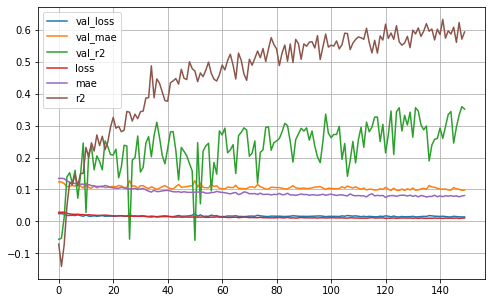

In [9]:
# show the learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

def evaluate_model(X,y):
    _, acc = model.evaluate(X, y, verbose = 0)
    return acc

In [10]:
from sklearn.metrics import r2_score
def evaluate_model(X,y):
    pred_y = model.predict(X)
    acc = r2_score(y, pred_y)
    return acc

In [11]:
# evaluate the DL model

# load the model
# model = load_model('model_clean_glove_hashtag.h5')

# evaluate model on training dataset
print('Train Accuracy: %0.2f%%' % (evaluate_model(x1_train, y1_train)*100))
print('Valid Accuracy: %0.2f%%' % (evaluate_model(x1_dev, y1_dev)*100))

acc_dl = evaluate_model(x1_test, y1_test) * 100
print('Test Accuracy: %0.2f%%' % acc_dl)
testing_acc = pd.DataFrame(columns = ["Classifier", "Testing accuracy(percent)"])
testing_acc.loc[0] = ["Deep Learning Model_clean_glove_hashtag", acc_dl]  

Train Accuracy: 89.36%
Valid Accuracy: 41.02%
Test Accuracy: 37.18%


In [12]:
# do a sanity check
model.predict(np.array([x1_train[2]]))[0]

array([0.7951993], dtype=float32)

In [13]:

x1_train1 = np.load('files/train_vectors/train_anger_vecs1.npy')
x1_dev1 = np.load('files/dev_vectors/dev_anger_vecs1.npy')
x1_test1 = np.load('files/test_vectors/test_anger_vecs1.npy')
y1_train1 = np.load('files/gold_label_vectors/train/anger1.npy')
y1_dev1 = np.load('files/gold_label_vectors/dev/anger1.npy')
y1_test1 = np.load('files/gold_label_vectors/test/anger1.npy')
embedding_vectors = np.load('files/embedding_vectors/glove_embedding_vectors1.npy')

max_length = 31
vocab_size = 11160

In [14]:
# train the DL model (CNN + LSTM)
to_file='model_noclean_glove_hashtag.png'
model = define_model(vocab_size, max_length, to_file)

start_time_dl =time.time()

history = model.fit(x1_train1, y1_train1, epochs = 200, batch_size = 16,verbose = 2, validation_data=(x1_dev1,y1_dev1))

trainingtime.loc[1] = ["Deep Learning Model_noclean_glove_hashtag", round((time.time()-start_time_dl), 2)] 

model.save('model_noclean_glove_hashtag.h5')

C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, activation="relu", strides=1, padding="valid")`
  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 31, 100)           1116000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 29, 64)            19264     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 64)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)               

Epoch 59/200
 - 0s - loss: 0.0123 - mae: 0.0867 - r2: 0.5127 - val_loss: 0.0154 - val_mae: 0.1028 - val_r2: 0.3074
Epoch 60/200
 - 0s - loss: 0.0125 - mae: 0.0884 - r2: 0.4947 - val_loss: 0.0160 - val_mae: 0.1043 - val_r2: 0.2803
Epoch 61/200
 - 0s - loss: 0.0132 - mae: 0.0900 - r2: 0.4769 - val_loss: 0.0161 - val_mae: 0.1056 - val_r2: 0.2665
Epoch 62/200
 - 0s - loss: 0.0122 - mae: 0.0882 - r2: 0.4995 - val_loss: 0.0162 - val_mae: 0.1049 - val_r2: 0.2650
Epoch 63/200
 - 0s - loss: 0.0124 - mae: 0.0883 - r2: 0.4961 - val_loss: 0.0151 - val_mae: 0.1016 - val_r2: 0.3087
Epoch 64/200
 - 0s - loss: 0.0118 - mae: 0.0867 - r2: 0.4898 - val_loss: 0.0164 - val_mae: 0.1057 - val_r2: 0.2330
Epoch 65/200
 - 0s - loss: 0.0126 - mae: 0.0886 - r2: 0.4905 - val_loss: 0.0169 - val_mae: 0.1059 - val_r2: 0.2230
Epoch 66/200
 - 0s - loss: 0.0119 - mae: 0.0863 - r2: 0.5324 - val_loss: 0.0172 - val_mae: 0.1073 - val_r2: 0.2135
Epoch 67/200
 - 0s - loss: 0.0118 - mae: 0.0857 - r2: 0.5228 - val_loss: 0.0178 

Epoch 130/200
 - 0s - loss: 0.0104 - mae: 0.0801 - r2: 0.5818 - val_loss: 0.0164 - val_mae: 0.1032 - val_r2: 0.2458
Epoch 131/200
 - 0s - loss: 0.0102 - mae: 0.0782 - r2: 0.5996 - val_loss: 0.0172 - val_mae: 0.1063 - val_r2: 0.2136
Epoch 132/200
 - 0s - loss: 0.0096 - mae: 0.0782 - r2: 0.6208 - val_loss: 0.0178 - val_mae: 0.1069 - val_r2: 0.1875
Epoch 133/200
 - 0s - loss: 0.0096 - mae: 0.0783 - r2: 0.6074 - val_loss: 0.0171 - val_mae: 0.1040 - val_r2: 0.2244
Epoch 134/200
 - 0s - loss: 0.0100 - mae: 0.0797 - r2: 0.5713 - val_loss: 0.0164 - val_mae: 0.1038 - val_r2: 0.2496
Epoch 135/200
 - 0s - loss: 0.0100 - mae: 0.0786 - r2: 0.5685 - val_loss: 0.0165 - val_mae: 0.1030 - val_r2: 0.2584
Epoch 136/200
 - 0s - loss: 0.0093 - mae: 0.0757 - r2: 0.6162 - val_loss: 0.0172 - val_mae: 0.1045 - val_r2: 0.2278
Epoch 137/200
 - 0s - loss: 0.0093 - mae: 0.0756 - r2: 0.6043 - val_loss: 0.0178 - val_mae: 0.1069 - val_r2: 0.2032
Epoch 138/200
 - 0s - loss: 0.0103 - mae: 0.0801 - r2: 0.5777 - val_loss

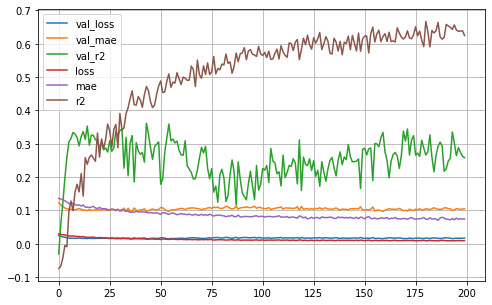

In [15]:
# show the learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [16]:
# evaluate the DL model

# load the model
# model = load_model('model_noclean_glove_hashtag.h5')



# evaluate model on training dataset
print('Train Accuracy: %0.2f%%' % (evaluate_model(x1_train1, y1_train1)*100))
print('Valid Accuracy: %0.2f%%' % (evaluate_model(x1_dev1, y1_dev1)*100))

acc_dl = evaluate_model(x1_test1, y1_test1) * 100
print('Test Accuracy: %0.2f%%' % acc_dl)
testing_acc.loc[1] = ["Deep Learning Model_noclean_glove_hashtag", acc_dl]

Train Accuracy: 90.85%
Valid Accuracy: 32.43%
Test Accuracy: 35.09%
